<a href="https://colab.research.google.com/github/VAMSEE92/concrete-compressive-strength/blob/main/ConcreteComprehensiveStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Concrete

/content/drive/My Drive/Concrete


In [ ]:
import tensorflow

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os


In [ ]:
# tensorflow libraries
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers



In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
dataset=pd.read_csv("concrete.csv")
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### We can see all columns are numerical however lets confirm it wether there is any column type object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
## Function for cheking the missing values
def missingValues(df):
    print("The number of missing values")
    for i in df:
        count=0
        if df[i].isnull==True:
            count+=1
        print(i,":",count)

In [ ]:
#Function to visualise outliers
def PlotOutliers(df):
    print("Visualising outliers.................")
    for i in df:
        fig=plt.figure()
        sns.boxplot(df[i])

In [ ]:
#Function to number of outliers
def outliers_cc(df):
    print("No of outliers.....................")
    for i in df:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1-1.5*IQR
        upperbound=Q3+1.5*IQR
        cnt=0
        for k in df[i].values:
            if (k<lowerbound or k>upperbound):
                cnt+=1
        print(i,'=','Q1: ',Q1,'Q3: ',Q3,'IQR: ',IQR,'lowerbound: ',lowerbound,'upperbound: ',upperbound,'outlier count: ',cnt)


The number of missing values
cement : 0
slag : 0
ash : 0
water : 0
superplastic : 0
coarseagg : 0
fineagg : 0
age : 0
strength : 0
No of outliers.....................
cement = Q1:  192.375 Q3:  350.0 IQR:  157.625 lowerbound:  -44.0625 upperbound:  586.4375 outlier count:  0
slag = Q1:  0.0 Q3:  142.95 IQR:  142.95 lowerbound:  -214.42499999999998 upperbound:  357.375 outlier count:  2
ash = Q1:  0.0 Q3:  118.3 IQR:  118.3 lowerbound:  -177.45 upperbound:  295.75 outlier count:  0
water = Q1:  164.9 Q3:  192.0 IQR:  27.099999999999994 lowerbound:  124.25000000000001 upperbound:  232.64999999999998 outlier count:  9
superplastic = Q1:  0.0 Q3:  10.2 IQR:  10.2 lowerbound:  -15.299999999999999 upperbound:  25.5 outlier count:  10
coarseagg = Q1:  932.0 Q3:  1029.4 IQR:  97.40000000000009 lowerbound:  785.8999999999999 upperbound:  1175.5000000000002 outlier count:  0
fineagg = Q1:  730.95 Q3:  824.0 IQR:  93.04999999999995 lowerbound:  591.3750000000001 upperbound:  963.5749999999999 out

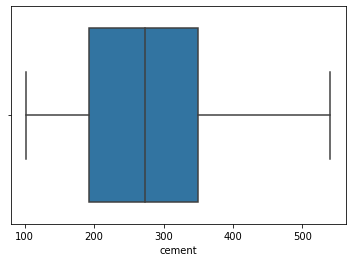

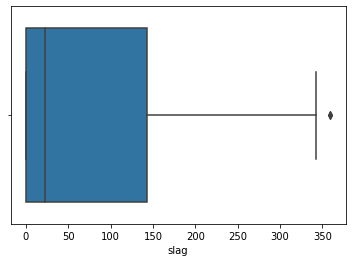

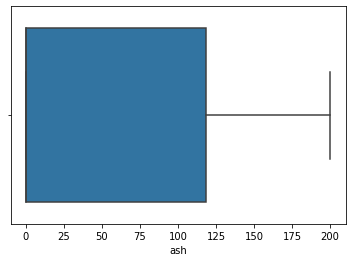

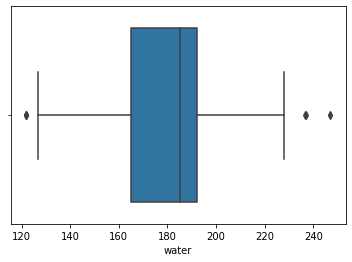

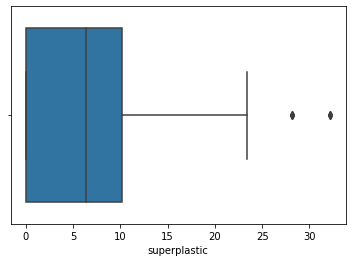

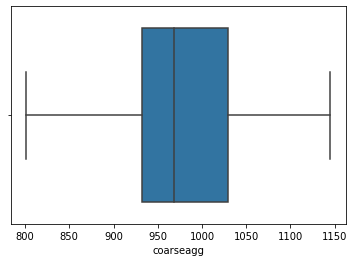

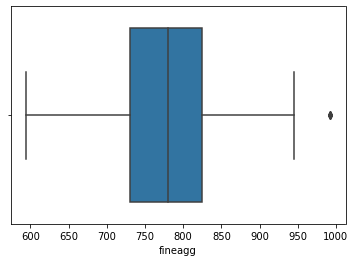

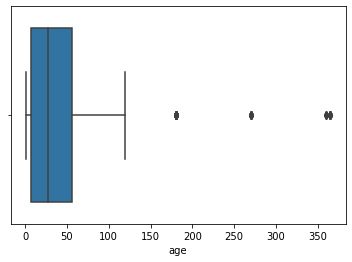

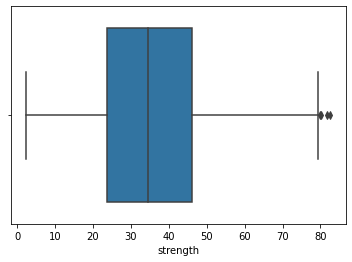

In [ ]:
# Passing all functions through pipeline
pipe=make_pipeline((missingValues(dataset)),(outliers_cc(dataset)),(PlotOutliers(dataset)))

##  Let us do a pair plot analysis to visually check number of likely clusters

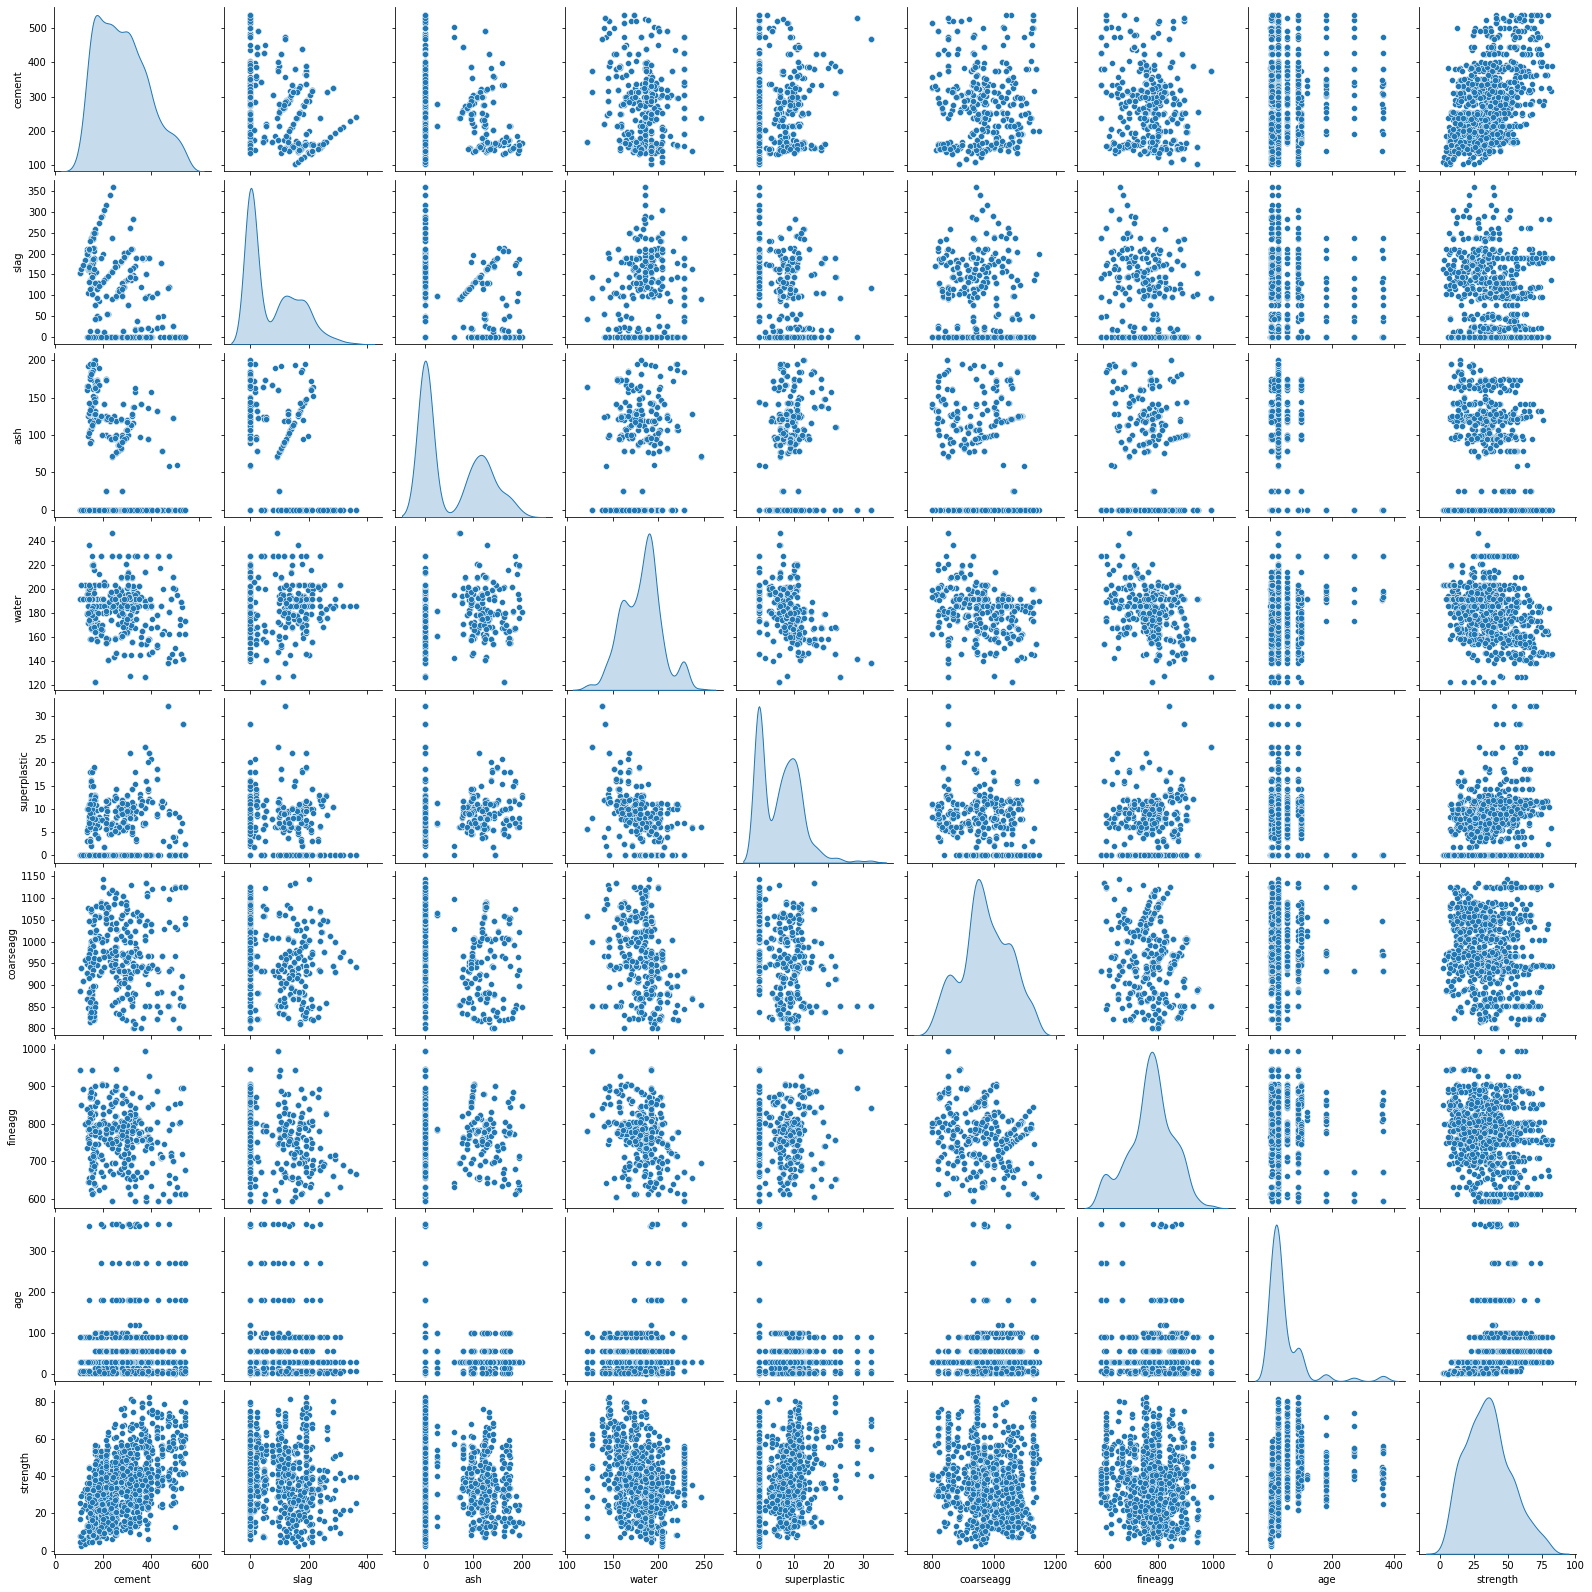

In [ ]:
sns.pairplot(dataset.iloc[:,0:],diag_kind='kde')

### Splitting and standardizing data

In [ ]:
# X = dataset.drop(['strength'],axis=1).apply(sts.zscore)
X = dataset.drop(['strength'],axis=1)

In [ ]:
# Splitting the data 
Y=dataset['strength']
# X=dataset.drop(['strength'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28


In [ ]:
X_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
339,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90
244,393.0,0.0,0.0,192.0,0.0,940.0,758.0,90
882,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14
567,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28
923,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7


In [ ]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_test.columns)
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.664379,-0.853882,-0.887574,1.018949,-1.063738,-0.006660,0.041334,-0.498924
1,0.892753,1.338789,-0.887574,-0.522038,0.652806,-0.629491,-0.187420,0.702810
2,-0.030256,-0.853882,-0.887574,0.456887,-1.063738,-0.084676,1.053850,-0.670601
3,0.949846,0.247089,-0.887574,2.189912,-1.063738,-0.552775,-2.221203,-0.608173
4,0.721473,-0.853882,1.326916,0.550564,0.805765,-2.256133,0.078835,-0.280427


In [ ]:
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
X_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.420393,0.965617,-0.887574,0.503725,-1.063738,-0.024864,-0.282421,0.687204
1,1.073548,-0.853882,-0.887574,0.503725,-1.063738,-0.448753,-0.171170,0.687204
2,-0.634493,-0.853882,1.829074,-1.248036,0.924733,1.011454,0.047584,-0.498924
3,-1.191153,1.266936,-0.887574,0.550564,0.465855,0.942539,-0.933682,-0.280427
4,0.283757,-0.853882,-0.887574,0.503725,-1.063738,-0.058671,0.978849,-0.608173


In [ ]:
svmModel=svm.SVR()
svmModel.fit(X_train,y_train)

SVR()

In [ ]:
print(svmModel.score(X_train,y_train))
print(svmModel.score(X_test,y_test))

0.6283540061821717
0.6405027920757809


Adding degree2 polynomial features

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

In [ ]:
X_train2

array([[ 1.00000000e+00,  6.64379428e-01, -8.53882436e-01, ...,
        -2.75286521e-04,  3.32287059e-03, -2.06224876e-02],
       [ 1.00000000e+00,  8.92752640e-01,  1.33878880e+00, ...,
         1.17979087e-01, -4.42412817e-01, -1.31720619e-01],
       [ 1.00000000e+00, -3.02557551e-02, -8.53882436e-01, ...,
        -8.92363204e-02,  5.67841059e-02, -7.06712942e-01],
       ...,
       [ 1.00000000e+00,  2.22857887e-01,  7.67442648e-01, ...,
         6.31760136e-01,  2.88103741e-01,  1.72442183e-01],
       [ 1.00000000e+00,  3.59881814e-01, -8.53882436e-01, ...,
         6.40089065e-01,  4.13901762e-01,  1.21613930e-01],
       [ 1.00000000e+00, -4.20393324e-01, -8.53882436e-01, ...,
        -1.19932037e-01,  5.67841059e-02, -9.49809703e-01]])

In [ ]:
X_test2

array([[ 1.        , -0.42039332,  0.96561748, ...,  0.00702209,
        -0.01708655, -0.19408096],
       [ 1.        ,  1.0735481 , -0.85388244, ...,  0.07681285,
        -0.30838461, -0.11762833],
       [ 1.        , -0.63449321, -0.85388244, ...,  0.04812901,
        -0.50463904, -0.02374082],
       ...,
       [ 1.        , -0.93994238, -0.85388244, ...,  0.08048422,
         0.88911573,  0.06437079],
       [ 1.        ,  0.50261507, -0.65107194, ..., -0.41803587,
        -0.07835136,  0.41957265],
       [ 1.        ,  0.71195718, -0.63368818, ..., -0.1212544 ,
         0.0273919 , -0.34810923]])

In [ ]:
svmPolyModel=svm.SVR()
svmPolyModel.fit(X_train2,y_train)

SVR()

In [ ]:
print(svmPolyModel.score(X_train2,y_train))
print(svmPolyModel.score(X_test2,y_test))

0.484038188166122
0.483390862670493


In [ ]:
kernal=['linear','rbf','poly']
for k in kernal:
  keModel=svm.SVR(kernel=k,C=100)
  keModel.fit(X_train,y_train)
  print('for kernel: ',k)
  print('accuracy train: ',keModel.score(X_train,y_train))
  print('accuracy: ',keModel.score(X_test,y_test))

for kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
for kernel:  rbf
accuracy train:  0.9267743833536825
accuracy:  0.8645569561423777
for kernel:  poly
accuracy train:  0.7826092577886651
accuracy:  0.7000306364264738


In [ ]:
for k in kernal:
  pKeModel=svm.SVR(kernel=k,C=100)
  pKeModel.fit(X_train2,y_train)
  print('for poly Kernal: ',k)
  print('accuracy on train polynomials: ',pKeModel.score(X_train2,y_train))
  print('accuracy on polynomials: ',pKeModel.score(X_test2,y_test))

for poly Kernal:  linear
accuracy on train polynomials:  0.7285526278744635
accuracy on polynomials:  0.6990157148176106
for poly Kernal:  rbf
accuracy on train polynomials:  0.932795904951691
accuracy on polynomials:  0.8372307334085908
for poly Kernal:  poly
accuracy on train polynomials:  0.8561226672587348
accuracy on polynomials:  0.544399071370941


In [ ]:
for k in kernal:
  for i in range(1,10):
    dModel=svm.SVR(kernel=k,degree=i,C=100)
    dModel.fit(X_train,y_train)
    print('degree: ',i, 'kernel: ',k)
    print('accuracy train: ',dModel.score(X_train,y_train))
    print('accuracy: ',dModel.score(X_test,y_test))

degree:  1 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  2 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  3 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  4 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  5 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  6 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  7 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  8 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  9 kernel:  linear
accuracy train:  0.5645924318796307
accuracy:  0.6142768524139762
degree:  1 kernel:  rbf
accuracy train:  0.9267743833536825
accuracy:  0.8645569561423777
degree:  2 kernel:  rbf
accuracy train:  0.9267743833536825
accuracy:  0.

From above with 'rbf' kernel and c values=100 we get accuracy upto 86.45 with out polynomials

### Random Forest

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28


In [ ]:
y_train.head()

185    22.53
286    64.90
600    11.36
691    32.82
474    40.87
Name: strength, dtype: float64

In [ ]:
X_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
339,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90
244,393.0,0.0,0.0,192.0,0.0,940.0,758.0,90
882,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14
567,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28
923,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7


In [ ]:
y_test.head()

339    47.78
244    48.79
882    33.70
567    18.28
923    14.99
Name: strength, dtype: float64

In [ ]:
rfcl = RandomForestRegressor(n_estimators=20,random_state=1,max_depth=25)
rcf1=rfcl.fit(X_train,y_train)

In [ ]:
print(rcf1.score(X_train,y_train))
print(rcf1.score(X_test,y_test))

0.9780037949716595
0.9087637264301153


with out polynomials n_estimators is 20 and max_depth=25 accuracy 90.87

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

In [ ]:
rfcP = RandomForestRegressor(n_estimators=20,random_state=1,max_depth=50)
rcfP=rfcP.fit(X_train2,y_train)

In [ ]:
print(rcfP.score(X_train2,y_train))
print(rcfP.score(X_test2,y_test))

0.9768988776335064
0.8928194243255658


#### From the above abservation random Forest is performing better. Saving the random forest model  

In [ ]:
pickle.dump(rcf1,open('Finalmodel.pkl','wb'))